In [1]:
import pandas as pd

In [55]:
data = pd.read_csv('companies.csv')

In [56]:
data.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


### Data cleaning

In [57]:
null_percentage = data.isnull().sum() / len(data) * 100

print(null_percentage)

id                       0.000000
Unnamed: 0.1             0.000000
entity_type              0.000000
entity_id                0.000000
parent_id              100.000000
name                     0.011702
normalized_name          0.013228
permalink                0.000000
category_code           37.326828
status                   0.000000
founded_at              53.586564
closed_at               98.667026
domain                  35.617874
homepage_url            35.617874
twitter_username        58.997828
logo_url                43.979486
logo_width              43.979486
logo_height             43.979486
short_description       96.371971
description             53.168865
overview                35.401139
tag_list                58.559778
country_code            55.233448
state_code              74.102151
city                    57.319400
region                   0.000000
first_investment_at     98.685851
last_investment_at      98.685851
investment_rounds       98.681780
invested_compa

In [58]:
drop_columns = ['id','Unnamed: 0.1','entity_id','entity_type', 'parent_id','normalized_name', 'permalink','domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description','region',
       'overview', 'tag_list','country_code', 'state_code', 'city', 'created_by','lat','lng','ROI']

data.drop(columns=drop_columns, inplace=True)
data.shape

(196553, 19)

In [59]:
data.loc[~data['closed_at'].isnull(), 'status'].value_counts()

status
closed      2584
acquired      36
Name: count, dtype: int64

In [60]:
data.describe()

,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships
count,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000
mean,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067
std,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309
min,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000
25%,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000
max,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000


In [61]:
data.columns

Index(['name', 'category_code', 'status', 'founded_at', 'closed_at',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_at',
       'updated_at'],
      dtype='object')

In [62]:
data = data[~((data['closed_at'].notnull()) & (data['status'] == 'acquired'))]

In [63]:
data['status'].value_counts()

status
operating    183441
acquired       9358
closed         2584
ipo            1134
Name: count, dtype: int64

In [64]:
if data.duplicated().sum() is True:
    df.drop_duplicates(inplace=True)

In [65]:
data.shape

(196517, 19)

### Data Encoding & Preprocessing

In [66]:
date_columns = ['founded_at', 'closed_at', 'created_at', 'updated_at', 'first_investment_at','last_investment_at','first_milestone_at','last_milestone_at']
for col in date_columns:
    data[col] = pd.to_datetime(data[col])

In [67]:
data.isna().sum()

name                       23
category_code           73367
status                      0
founded_at             105326
closed_at              193933
first_investment_at    193934
last_investment_at     193934
investment_rounds      193926
invested_companies     193926
first_funding_at       165035
last_funding_at        165035
funding_rounds         164835
funding_total_usd      168665
first_milestone_at     104846
last_milestone_at      104846
milestones             104846
relationships           66883
created_at                  0
updated_at                  0
dtype: int64

In [68]:
data['years_to_close'] = data['closed_at'] - data['founded_at']

data['years_to_close'] = data['years_to_close'].dt.days / 365

current_year = pd.to_datetime('today').year
data['company_age'] = current_year - data['founded_at'].dt.year
data['company_age']

0         19.0
1          NaN
2          NaN
3         16.0
4         16.0
          ... 
196548    17.0
196549    17.0
196550    65.0
196551    16.0
196552    17.0
Name: company_age, Length: 196517, dtype: float64

In [69]:
data = data[data['name'].notna()]
data =data[data['relationships'].notna()]
data = data[data['company_age'].notna()]

In [71]:
def milestone_categorizer(x):
    if x <= 5:
        return "1-5"
    elif x <= 10:
        return "6-10"
    else:
        return "10+"

data['milestones_category'] = data['milestones'].apply(milestone_categorizer)
data = data.drop('milestones', axis=1)

In [72]:
cat_code = data['category_code'].value_counts()
cat_code

category_code
software            9798
web                 8671
ecommerce           4296
other               3957
mobile              3845
advertising         3331
games_video         2956
enterprise          2507
consulting          2385
biotech             2099
public_relations    1424
hardware            1207
network_hosting     1203
education           1120
search               970
cleantech            793
social               735
analytics            725
finance              603
security             575
health               524
medical              422
semiconductor        364
travel               326
news                 322
legal                258
fashion              255
hospitality          245
manufacturing        225
messaging            201
music                195
real_estate          193
photo_video          185
sports               136
local                127
nonprofit            115
transportation       102
design                99
automotive            93
nanotech   

In [73]:
data.dropna(subset=['category_code'], inplace=True)

In [74]:
def cat_code_categorizer(x):
    if x in ['software','web','ecommerce','games_video','mobile','enterprise','hardware','network_hosting','search','analytics','messaging','photo_video']:
        return 'Technology & Software'
    elif x in ['advertising','consulting','public_relations','legal','design']:
        return 'Business Services'
    elif x in ['biotech','nanotech','health','medical']:
        return 'Healthcare & Biotechnology'
    elif x in ['fashion','sports','automotive','pets','music','travel']:
        return 'Consumer Goods & Services'
    elif x in ['real_estate','finance']:
        return 'Finance & Real Estate'
    elif x in ['hospitality','local','nonprofit']:
        return 'Hospitality & Services'
    elif x in ['news','education','government','transportation','social','security']:
        return 'Government & Public Sector'
    elif x in ['cleantech','manufacturing','semiconductor']:
        return 'Energy & Manufacturing'
    else:
        return 'Other'

In [75]:
data['category_code_new'] = data['category_code'].apply(cat_code_categorizer)
data['category_code_new'].value_counts()

category_code_new
Technology & Software         36564
Business Services              7497
Other                          3957
Healthcare & Biotechnology     3086
Government & Public Sector     2874
Energy & Manufacturing         1382
Consumer Goods & Services      1038
Finance & Real Estate           796
Hospitality & Services          487
Name: count, dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57681 entries, 0 to 196552
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 57681 non-null  object        
 1   category_code        57681 non-null  object        
 2   status               57681 non-null  object        
 3   founded_at           57681 non-null  datetime64[ns]
 4   closed_at            1557 non-null   datetime64[ns]
 5   first_investment_at  710 non-null    datetime64[ns]
 6   last_investment_at   710 non-null    datetime64[ns]
 7   investment_rounds    711 non-null    float64       
 8   invested_companies   711 non-null    float64       
 9   first_funding_at     20502 non-null  object        
 10  last_funding_at      20502 non-null  object        
 11  funding_rounds       20640 non-null  float64       
 12  funding_total_usd    18470 non-null  float64       
 13  first_milestone_at   39866 non-null

## Feature Engineering

In [79]:
data['years_to_last_update'] = data['updated_at'] - data['created_at']
data['years_to_last_update'] = data['years_to_last_update'].dt.days / 365
data['funding_per_round'] = data['funding_total_usd'] / data['funding_rounds']
data['years_from_first_to_last_investment'] = data['last_investment_at'] - data['first_investment_at']
data['years_from_first_to_last_investment'] = data['years_from_first_to_last_investment'].dt.days / 365

In [81]:
data = data[data['funding_total_usd'].notna()]

In [86]:
data['closed_at'].fillna(0, inplace=True)
data['years_to_close'].fillna(0, inplace=True)
data['investment_rounds'].fillna(0, inplace=True)
data['invested_companies'].fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19340\3000439755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['closed_at'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_19340\3000439755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['years_to_close'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp

In [88]:
data.drop(columns=['created_at','updated_at','first_investment_at','last_investment_at','years_from_first_to_last_investment','first_milestone_at','last_milestone_at'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19340\1635772619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['created_at','updated_at','first_investment_at','last_investment_at','years_from_first_to_last_investment','first_milestone_at','last_milestone_at'], inplace=True)


In [89]:
data['first_funding_at'] = pd.to_datetime(data['first_funding_at'])
data['last_funding_at'] = pd.to_datetime(data['last_funding_at'])


data['first_to_last_funding_round_diff'] = data['last_funding_at'] - data['first_funding_at']
data['first_to_last_funding_round_diff'] = data['first_to_last_funding_round_diff'].dt.days / 365
     

C:\Users\user\AppData\Local\Temp\ipykernel_19340\2012829432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_funding_at'] = pd.to_datetime(data['first_funding_at'])
C:\Users\user\AppData\Local\Temp\ipykernel_19340\2012829432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_funding_at'] = pd.to_datetime(data['last_funding_at'])
C:\Users\user\AppData\Local\Temp\ipykernel_19340\2012829432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [90]:
data = data[data['first_to_last_funding_round_diff'].notna()]
data.drop(columns=['first_funding_at','last_funding_at'], inplace=True)

In [92]:
data['invested_companies'].value_counts()

invested_companies
0.0      18229
1.0        115
2.0         20
3.0         12
5.0          8
7.0          7
6.0          4
4.0          3
14.0         2
8.0          2
18.0         2
9.0          1
38.0         1
26.0         1
16.0         1
268.0        1
30.0         1
79.0         1
73.0         1
459.0        1
20.0         1
11.0         1
33.0         1
47.0         1
57.0         1
Name: count, dtype: int64

In [93]:
data.skew(numeric_only=True)

investment_rounds                   90.443359
invested_companies                  93.722990
funding_rounds                       2.279960
funding_total_usd                   36.769248
relationships                       45.713744
years_to_close                       8.787521
company_age                          4.918425
years_to_last_update                 0.732283
funding_per_round                   42.092798
first_to_last_funding_round_diff     3.096157
dtype: float64

In [95]:
def invested_companies_categorizer(x):
    if x <= 5:
        return "1-5"
    else:
        return '6+'
    
data['invested_companies_category'] = data['invested_companies'].apply(invested_companies_categorizer)
data = data.drop('invested_companies', axis=1)

In [96]:
data['relationships'].value_counts().head(30)

relationships
2.0     3278
1.0     3054
3.0     2858
4.0     1964
5.0     1352
6.0     1020
7.0      710
8.0      552
9.0      473
10.0     382
11.0     353
12.0     317
13.0     291
14.0     244
15.0     211
16.0     171
17.0     156
18.0     144
19.0     124
20.0     100
21.0      86
22.0      78
23.0      60
24.0      46
26.0      46
25.0      42
27.0      32
29.0      30
28.0      26
30.0      24
Name: count, dtype: int64

In [98]:
0.0 in data['relationships'].keys()

True

In [100]:
def relationships_categorizer(x):
    if x==0.0:
        return '0'
    elif x <= 6:
        return "1-6"
    else:
        return '6+'
    

data['relationships_category'] = data['relationships'].apply(relationships_categorizer)
data = data.drop('relationships', axis=1)

In [101]:
data.drop(columns=['founded_at','closed_at','category_code'], inplace=True)
data['years_to_last_update'] = data['years_to_last_update'].astype(int)
data['funding_per_round'] = data['funding_per_round'].astype(int)
data['years_to_close'] = data['years_to_close'].astype(int)
data['first_to_last_funding_round_diff'] = data['first_to_last_funding_round_diff'].astype(int)

In [102]:
data['investment_rounds'].value_counts()

investment_rounds
0.0      18229
1.0        110
2.0         21
3.0         14
5.0          6
8.0          5
6.0          5
9.0          4
7.0          3
4.0          3
37.0         2
17.0         2
19.0         1
40.0         1
29.0         1
14.0         1
297.0        1
30.0         1
24.0         1
11.0         1
89.0         1
478.0        1
96.0         1
49.0         1
18.0         1
58.0         1
Name: count, dtype: int64

In [103]:
def investment_rounds_categorizer(x):
    if x == 0:
        return '0'
    else:
        return '1+'
    
data['investment_rounds_category'] = data['investment_rounds'].apply(investment_rounds_categorizer)
data = data.drop('investment_rounds', axis=1)

In [104]:
data['years_to_close'].value_counts()

years_to_close
 0     17443
 2       208
 1       154
 3       150
 4       117
 5        84
 6        71
 7        46
 8        33
 9        32
 10       17
 11       13
 13        9
 12        9
 14        6
 15        5
 16        3
 22        2
-8         2
-3         2
 21        1
-9         1
 23        1
-2         1
 17        1
 28        1
 33        1
 37        1
 24        1
 19        1
 29        1
 20        1
Name: count, dtype: int64

In [105]:
data = data[data['years_to_close']>=0]

In [106]:
def years_to_close_categorizer(x):
    if x == 0:
        return '0'
    elif x>=1 and x<=4:
        return '1-5'
    elif x>=6 and x<=11:
        return '6-11'
    else:
        return '12+'
    
data['years_to_close_category'] = data['years_to_close'].apply(years_to_close_categorizer)
data = data.drop('years_to_close', axis=1)

In [107]:
data['company_age'].value_counts().head(40)

company_age
13.0    2560
14.0    2148
12.0    1968
15.0    1718
17.0    1478
16.0    1409
18.0    1186
19.0     884
20.0     694
11.0     627
21.0     569
24.0     536
22.0     465
25.0     452
23.0     427
26.0     229
27.0     188
28.0     142
29.0     111
30.0      77
32.0      54
31.0      52
33.0      40
35.0      39
39.0      34
34.0      32
36.0      29
40.0      28
38.0      24
41.0      23
37.0      22
44.0      16
45.0      12
42.0      12
43.0      10
48.0      10
46.0       9
55.0       8
50.0       6
49.0       5
Name: count, dtype: int64

In [109]:
print(data['company_age'].unique().min())
print(data['company_age'].unique().max())

10.0
121.0


In [110]:
def company_age_categorizer(x):
    if x < 20:
        return '10-20'
    elif x < 30:
        return '21-30'
    else:
        return '31+'
    
data['company_age_category'] = data['company_age'].apply(company_age_categorizer)
data = data.drop('company_age', axis=1)

In [111]:
def funding_per_round_categorizer(x):
    if x < 0:
        return 'down_round'
    elif x >=0 and x <= 10000000:
        return '0-10M'
    else:
        return '10M+'
    
data['funding_per_round_category'] = data['funding_per_round'].apply(funding_per_round_categorizer)
data = data.drop('funding_per_round', axis=1)
     

In [112]:
data['first_to_last_funding_round_diff'].value_counts()

first_to_last_funding_round_diff
0     11820
1      2424
2      1547
3       935
4       621
5       449
6       293
7       164
8        79
9        29
10       22
11       14
12        7
13        5
53        1
14        1
15        1
Name: count, dtype: int64

In [113]:
def first_to_last_funding_round_diff_categorizer(x):
    if x == 0:
        return '0'
    elif x >= 0 and x <= 3:
        return '0-3'
    elif x>=4 and x<=7:
        return '4-7'
    else:
        return '7+'
    

data['first_to_last_funding_round_diff_category'] = data['first_to_last_funding_round_diff'].apply(first_to_last_funding_round_diff_categorizer)
data = data.drop('first_to_last_funding_round_diff', axis=1)

In [115]:
company_age_acquired = data[data['status'] == 'acquired']['company_age_category'].mode()
print("Most common company age for acquired companies:", (company_age_acquired))

company_age_closed = data[data['status'] == 'closed']['company_age_category'].mode()
print("Most common company age for closed companies:", (company_age_closed))

company_age_operating = data[data['status'] == 'operating']['company_age_category'].mode()
print("Most common company age for operating companies:", (company_age_operating))

company_age_ipo = data[data['status'] == 'ipo']['company_age_category'].mode()
print("Most common company age for IPO companies:", (company_age_ipo))

Most common company age for acquired companies: 0    10-20
Name: company_age_category, dtype: object
Most common company age for closed companies: 0    10-20
Name: company_age_category, dtype: object
Most common company age for operating companies: 0    10-20
Name: company_age_category, dtype: object
Most common company age for IPO companies: 0    21-30
Name: company_age_category, dtype: object


In [116]:
funding_per_round_acquired = data[data['status'] == 'acquired']['funding_per_round_category'].mode()
print("Most common funding per round for acquired companies:", (funding_per_round_acquired))

funding_per_round_closed = data[data['status'] == 'closed']['funding_per_round_category'].mode()
print("Most common funding per round for closed companies:", (funding_per_round_closed))

funding_per_round_operating = data[data['status'] == 'operating']['funding_per_round_category'].mode()
print("Most common funding per round for operating companies:", (funding_per_round_operating))

funding_per_round_ipo = data[data['status'] == 'ipo']['funding_per_round_category'].mode()
print("Most common funding per round for IPO companies:", (funding_per_round_ipo))

Most common funding per round for acquired companies: 0    0-10M
Name: funding_per_round_category, dtype: object
Most common funding per round for closed companies: 0    0-10M
Name: funding_per_round_category, dtype: object
Most common funding per round for operating companies: 0    0-10M
Name: funding_per_round_category, dtype: object
Most common funding per round for IPO companies: 0    10M+
Name: funding_per_round_category, dtype: object


In [117]:
first_to_last_funding_round_diff_acquired = data[data['status'] == 'acquired']['first_to_last_funding_round_diff_category'].mode()
print("Most common first to last funding round difference for acquired companies:", (first_to_last_funding_round_diff_acquired))
first_to_last_funding_round_diff_closed = data[data['status'] == 'closed']['first_to_last_funding_round_diff_category'].mode()
print("Most common first to last funding round difference for closed companies:", (first_to_last_funding_round_diff_closed))
first_to_last_funding_round_diff_operating = data[data['status'] == 'operating']['first_to_last_funding_round_diff_category'].mode()
print("Most common first to last funding round difference for operating companies:", (first_to_last_funding_round_diff_operating))
first_to_last_funding_round_diff_ipo = data[data['status'] == 'ipo']['first_to_last_funding_round_diff_category'].mode()
print("Most common first to last funding round difference for IPO companies:", (first_to_last_funding_round_diff_ipo))
     

Most common first to last funding round difference for acquired companies: 0    0
Name: first_to_last_funding_round_diff_category, dtype: object
Most common first to last funding round difference for closed companies: 0    0
Name: first_to_last_funding_round_diff_category, dtype: object
Most common first to last funding round difference for operating companies: 0    0
Name: first_to_last_funding_round_diff_category, dtype: object
Most common first to last funding round difference for IPO companies: 0    0
Name: first_to_last_funding_round_diff_category, dtype: object


In [118]:
category_code_acquired = data[data['status'] == 'acquired']['category_code_new'].mode()
print("Most common category code for acquired companies:", (category_code_acquired))
category_code_closed = data[data['status'] == 'closed']['category_code_new'].mode()
print("Most common category code for closed companies:", (category_code_closed))
category_code_operating = data[data['status'] == 'operating']['category_code_new'].mode()
print("Most common category code for operating companies:", (category_code_operating))
category_code_ipo = data[data['status'] == 'ipo']['category_code_new'].mode()
print("Most common category code for IPO companies:", (category_code_ipo))

Most common category code for acquired companies: 0    Technology & Software
Name: category_code_new, dtype: object
Most common category code for closed companies: 0    Technology & Software
Name: category_code_new, dtype: object
Most common category code for operating companies: 0    Technology & Software
Name: category_code_new, dtype: object
Most common category code for IPO companies: 0    Technology & Software
Name: category_code_new, dtype: object


In [119]:
milestone_category_acquired = data[data['status'] == 'acquired']['milestones_category'].mode()
print("Most common milestone category for acquired companies:", (milestone_category_acquired))
milestone_category_closed = data[data['status'] == 'closed']['milestones_category'].mode()
print("Most common milestone category for closed companies:", (milestone_category_closed))
milestone_category_operating = data[data['status'] == 'operating']['milestones_category'].mode()
print("Most common milestone category for operating companies:", (milestone_category_operating))
milestone_category_ipo = data[data['status'] == 'ipo']['milestones_category'].mode()
print("Most common milestone category for IPO companies:", (milestone_category_ipo))

Most common milestone category for acquired companies: 0    1-5
Name: milestones_category, dtype: object
Most common milestone category for closed companies: 0    1-5
Name: milestones_category, dtype: object
Most common milestone category for operating companies: 0    1-5
Name: milestones_category, dtype: object
Most common milestone category for IPO companies: 0    1-5
Name: milestones_category, dtype: object


In [120]:
data['status'].value_counts()

status
operating    15442
acquired      1633
closed        1039
ipo            298
Name: count, dtype: int64

In [114]:
data['years_to_last_update'].value_counts()

years_to_last_update
0    8853
1    2580
3    2181
2    2149
4    1625
5     913
6     111
Name: count, dtype: int64

In [122]:
def years_to_last_update_categorizer(x):
    if x == 0:
        return '0'
    elif x>=1 and x<=4:
        return '1-4'
    else:
        return '5+'
    
data['years_to_last_update_category'] = data['years_to_last_update'].apply(years_to_last_update_categorizer)
data = data.drop('years_to_last_update', axis=1)

In [123]:
data.columns

Index(['name', 'status', 'funding_rounds', 'funding_total_usd',
       'milestones_category', 'category_code_new',
       'invested_companies_category', 'relationships_category',
       'investment_rounds_category', 'years_to_close_category',
       'company_age_category', 'funding_per_round_category',
       'first_to_last_funding_round_diff_category',
       'years_to_last_update_category'],
      dtype='object')

In [124]:
data.drop(columns=['name'], inplace=True)

In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.model_selection import train_test_split
x=data.drop('status',axis=1) # This line drops the 'status' column from the DataFrame
y=data['status']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

cat_label_features = ['milestones_category','invested_companies_category','relationships_category','investment_rounds_category','years_to_close_category','first_to_last_funding_round_diff_category','years_to_last_update_category','company_age_category']
categorical_features = ['category_code_new', # Removed 'status' from this list
 'funding_per_round_category']

# Apply Label Encoding for label features
for feature in cat_label_features:
    x_train[feature] = le.fit_transform(x_train[feature])
    x_val[feature] = le.transform(x_val[feature])
    x_test[feature] = le.transform(x_test[feature])

# One-Hot Encoding for categorical features
x_train_encoded = pd.get_dummies(x_train, columns=categorical_features, drop_first=True)
x_val_encoded = pd.get_dummies(x_val, columns=categorical_features, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_features, drop_first=True)

# Align the columns in case there are missing columns after encoding
x_train_encoded, x_val_encoded = x_train_encoded.align(x_val_encoded, join='left', axis=1)
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1)

# Fill any NaNs after aligning columns (resulting from categorical variables missing in one of the sets)
x_val_encoded.fillna(0, inplace=True)
x_test_encoded.fillna(0, inplace=True)

<Axes: >

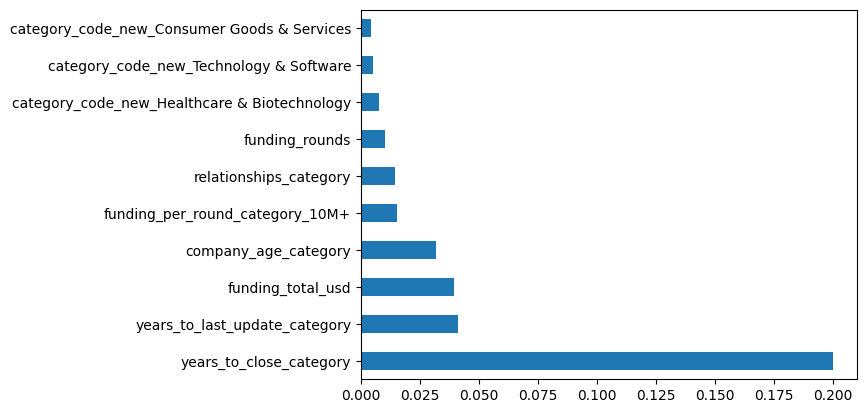

In [128]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x_train_encoded, y_train)


mi_scores = pd.Series(mi_scores, index=x_train_encoded.columns)
mi_scores = mi_scores.sort_values(ascending=False)


mi_scores[:10].plot(kind='barh')

In [129]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

x_train_pca = pca.fit_transform(x_train_encoded)
x_val_pca = pca.transform(x_val_encoded)
x_test_pca = pca.transform(x_test_encoded)

print(x_train_pca.shape)

(11047, 1)


In [130]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
selector = SelectKBest(chi2, k=10)

X_train_selected = selector.fit_transform(x_train_encoded, y_train)
X_val_selected = selector.transform(x_val_encoded)
X_test_selected = selector.transform(x_test_encoded)


X_train_selected.shape

(11047, 10)